# E-News Express Project

In [294]:
import scipy #import scipy pacakge and max sure version is correct
scipy.__version__

'1.6.1'

In [295]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 

import scipy.stats as stats 

In [296]:
import warnings
warnings.filterwarnings("ignore") #used this line of code to ignore all warnings, which can be dangerous

## Q1. EDA

In [297]:
data = pd.read_csv('abtest.csv') #reads the dataframe that we will be working with into our notebook
data.head() #shows the head of table

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [298]:
data.shape #displays there are 100 observations with 6 total variables including user_id

(100, 6)

In [299]:
data.dtypes #displays what type of data each variable is

user_id                     int64
group                      object
landing_page               object
time_spent_on_the_page    float64
converted                  object
language_preferred         object
dtype: object

In [300]:
cols = ['group', 'landing_page', 'language_preferred', 'converted'] #stores the object data types into a variable, "cols"
data[cols] = data[cols].astype('category') #changes all object variable to categorical variables

In [301]:
data.info() #displays data type of columns and checks for nulls
data.isnull().sum() #checks for null counts in dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [302]:
data.describe() #displays summary statistics of integer data, does not account for other variables

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


## EDA - Univariate Analysis

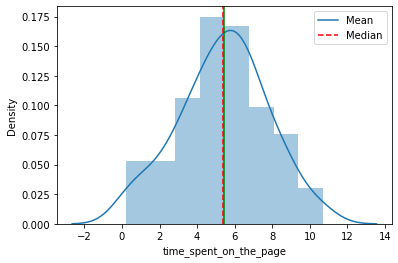

In [303]:
sns.distplot(data['time_spent_on_the_page']) #plotted a distplot to see that the average time spent on page is a normalized distribution
mean=data['time_spent_on_the_page'].mean() #assigns the mean of time spent on page to variable "mean"
median=data['time_spent_on_the_page'].median() #assigns the median of time spent on page to variable "median"
plt.axvline(mean, color='r', linestyle='--') #plots the mean on the graph 
plt.axvline(median, color='g', linestyle='-') #plost the median on the graph 
plt.legend({'Mean':mean,'Median':median}) #creates a legend on the graph showing mean and median

In [304]:
print(stats.normaltest(data["time_spent_on_the_page"])) #This test confirms that the data is normanlly distributed pvalue higher than alpha

NormaltestResult(statistic=0.5891950963743156, pvalue=0.7448312858560384)


In [305]:
data.groupby('group').count() #to confirm how many people are in each group

,user_id,landing_page,time_spent_on_the_page,converted,language_preferred
group,,,,,
control,50,50,50,50,50
treatment,50,50,50,50,50


In [306]:
data.groupby('landing_page').count() #to confirm how may received old and new landing pages

,user_id,group,time_spent_on_the_page,converted,language_preferred
landing_page,,,,,
new,50,50,50,50,50
old,50,50,50,50,50


In [307]:
data.groupby('language_preferred').count() #to see the most common languages preferred

,user_id,group,landing_page,time_spent_on_the_page,converted
language_preferred,,,,,
English,32,32,32,32,32
French,34,34,34,34,34
Spanish,34,34,34,34,34


In [308]:
data.groupby('converted').count() #to see how many people converted

,user_id,group,landing_page,time_spent_on_the_page,language_preferred
converted,,,,,
no,46,46,46,46,46
yes,54,54,54,54,54


 From doing our univariate analysis, we see that there is an even number of subjects who are in the control and treatment group, as well as an even number of those given the new and old landing pages.  We also see that the time a subject spent on the page is normally distributed with a mean of 5.38 and a standard deviation of 2.38.  The data has been cleaned, there are 100 rows of data and no null values.

## EDA - Multivariate Analysis

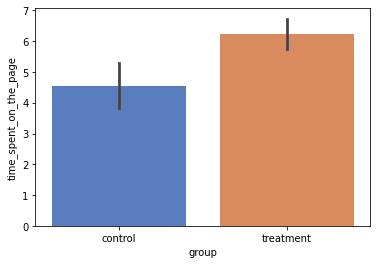

In [309]:
ax = sns.barplot(x='group', y='time_spent_on_the_page', data=data, palette='muted') #plots how much time each group spent on page

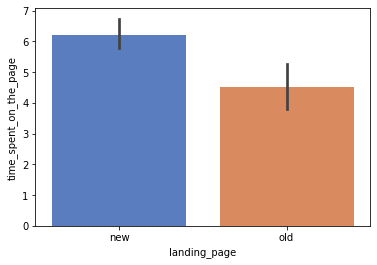

In [310]:
ax = sns.barplot(x='landing_page', y='time_spent_on_the_page', data=data, palette='muted') #plots how much time people spent on landing page by which they were given

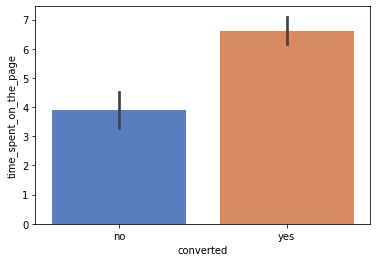

In [311]:
ax = sns.barplot(x='converted', y='time_spent_on_the_page', data=data, palette='muted') #plots how much time people who converted and did not spent on landing page

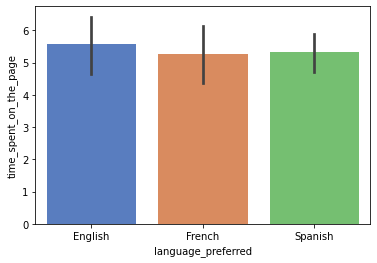

In [312]:
ax = sns.barplot(x='language_preferred', y='time_spent_on_the_page', data=data, palette='muted') #plots how much time people of different language spent on landing page

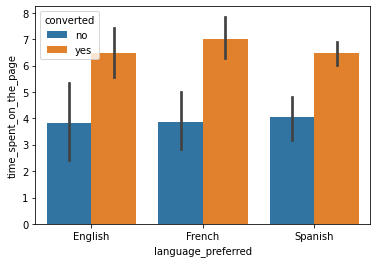

In [313]:
sns.barplot(data=data,x='language_preferred',y='time_spent_on_the_page',hue='converted') #plots how much time different language speakers spent on page grouped by whether they converted
plt.show()

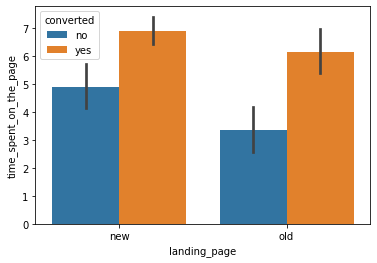

In [314]:
sns.barplot(data=data,x='landing_page',y='time_spent_on_the_page',hue='converted') #plots how much time people spend on landing page, whether they were given old or new grouped by whether they converted
plt.show()

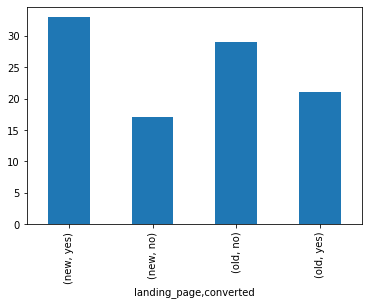

In [315]:
ax1 = data.groupby(['landing_page'])['converted'].value_counts().plot(kind='bar',stacked = True) #plots how many people converted and received the new or old landing page 

<AxesSubplot:xlabel='language_preferred', ylabel='Count'>

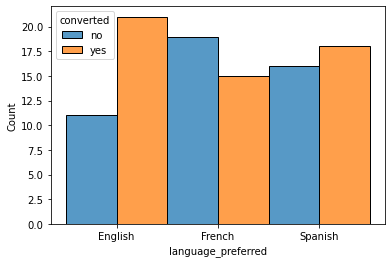

In [316]:
sns.histplot(binwidth=0.1, x="language_preferred", hue="converted", data=data, stat="count", multiple="dodge") 
#this plot shows us if there is any correlation between conversion and language preferred.

From our multivariate analysis, we can see that there is a strong correlation that those who were in the new landing page group spent more time on the landing page and also were more likely to convert than those who received the old landing page.  We also see there is not much of a difference in converts and time spent based on language preferred.  We do see that , overall, people with an English preference marginally spent the most time on the landing page, but people with a French preference, who converted, marginally spend the most time on the landing page out of everyone who converted. We can also see that prefererd English readers are most likely to convert, while preferred French readers are least likely.

## Q2. Do the users spend more time on the new landing page than the old landing page?

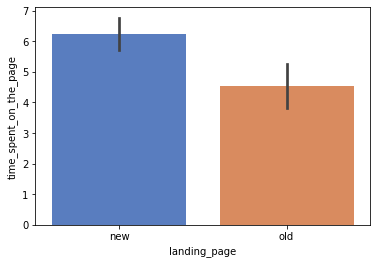

In [317]:
ax = sns.barplot(x='landing_page', y='time_spent_on_the_page', data=data, palette='muted') #plots how much time people spent on landing page by which they were given

Without doing any statistical testing, we can see from the graph what the likely outcome of our test will be. The hypothesis
<br> would be that people with the new landing page spend more time, on average, on the page than those with the old landing page.
<br> But, we need to prove it with a test.
<br> Let's start by finding out what the means and stds are of our 2 samples and decide what kind of test to use.

In [318]:
print(data.groupby('landing_page')['time_spent_on_the_page'].mean()) #This tells us the means of time spent on the page on old and new landing pages
print(data.groupby('landing_page')['time_spent_on_the_page'].std())  #This tells us the standard deviations of time spent on the page on old and new landing pages

#We need this to be able to tell if we can run a 2 sample independent t-test

landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64
landing_page
new    1.817031
old    2.581975
Name: time_spent_on_the_page, dtype: float64


Given that we have 2 independent samples with unequal standard deviations, we should use an independent 2 sample t-test.
<br> Let's see if the data meets our independent 2 sample t-test assumptions.

### Assumptions
Continuous data - Yes, time spent on the page is continuous
<br>Normally distributed populations - Yes, from the CLT, we know our data is normal, but we also plotted to double check.
<br> Independent populations - There are 2 separate sample groups from 2 separate populations. They are indepedent.
<br> Unequal population standard deviations - The standard deviations are different, so population std is assumed to be as well.
<br> Random sampling from the population - Yes, the background states that all sampling was random
<br>We can use a 2 sample T-Test.

### Hypotheses
<br>u1 = avg time spent on old landing page 
<br>u2= avg time spent on new landing page
<br>$H_{0}$: u1 = u2
<br> $H_{a}$: u1 < u2

In [319]:
a = data[(data["landing_page"]=="old")] #slicing the dataframe to get us only values where landing page is "old"
b = data[(data["landing_page"]=="new")] #slicing the dataframe to get us only values where landing page is "new"

In [320]:
from scipy.stats import ttest_ind #import the proper scipy test

# find the p-value using the 2 sample indepedent t-test
test_stat, p_value = ttest_ind(b['time_spent_on_the_page'], a['time_spent_on_the_page'].dropna(), equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Insight
Since the p-value (~0.0001) is far lesser than the significane level of 0.05, we can comfortably reject the null hypothesis.
<br> We have the statistical evidence to say that those using the new landing page spend an average of more time on the page at the 5% significance level.

## Q3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

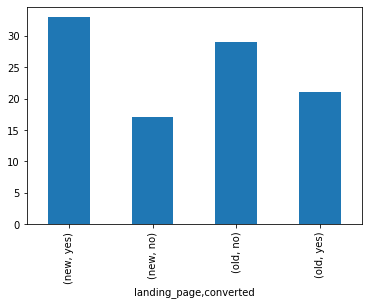

In [321]:
ax1 = data.groupby(['landing_page'])['converted'].value_counts().plot(kind='bar',stacked = True) #plots how many people converted and received the new or old landing page 

From this graph, we can tell that those who received the new landing page were more likely to convert than those who received the old landing page. Let's use hypothesis testing to see if we can reject the hypothesis that old and new landing page users are equally likely to convert.

Since we are using proportions, lets test to see if we can use the proportions Z-test by seeing if our data meets the assumptions.

### Assumptions
Binomially distrubted - yes, users either convert or do not convert
<br> We know there is random sampling
<br> The binomial distribution can be approximated to normal distribution because np and n(1-p) are both greather than 10.
<br>We can use the Z-test.

### Hypotheses
<br>p1 = conversion rate of users who visit old page
<br> p2 = conversion rate of users who visit new page
<br> $H_{0}$ : p1 = p2
<br> $H_{a}$: p1 $\neq$ p2

In [322]:
print(a['converted'].value_counts()) #counts how many "yes" values there are for converted old landing page users
print(b['converted'].value_counts()) #counts how many "yes" values there are for converted new landing page users

no     29
yes    21
Name: converted, dtype: int64
yes    33
no     17
Name: converted, dtype: int64


In [323]:
from statsmodels.stats.proportion import proportions_ztest #import the proportions Z-test from statsmodels


c_count = np.array([21, 33]) #stores the number of conversions from both groups

n = np.array([50, 50]) #stores the sample sizes from both groups

test_stat, p_value = proportions_ztest(c_count, n) #uses the statsmodels proportions Z-test to find the p-value
print('The p-value is ' + str(p_value))

The p-value is 0.016052616408112556


### Insight
Since the p-value (~0.01) is lesser than the significance level of 0.05, we can reject the null hypothesis.
<br>We have the statistical evidence to say that those using the old landing page are not equally likely to convert (subscribe) 
<br> as those using the new landing page at the 5% significance level.

## Q4. Does the converted status depend on the preferred language?

<AxesSubplot:xlabel='language_preferred', ylabel='Count'>

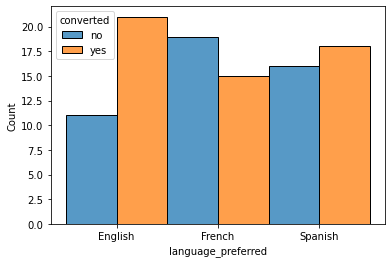

In [324]:
sns.histplot(binwidth=0.1, x="language_preferred", hue="converted", data=data, stat="count", multiple="dodge") 
#this plot shows us if there is any dependence between conversion and language preferred.

While it does look like preferred English speakers are more likely to convert and preferred French readers are less likely to convert, it is hard to get a good grasp on this from just a visual.
Let's do a hypothesis test to confirm or deny that preferred language and coversion are independent.


### Assumptions
Since our data is random, has more than 5 samples, and are categorical variables, lets use a chi test for independence. We can start by making a cross tab of the variables. 

### Hypotheses
$H_{0}$ : Conversion is indepdent of language preference
<br>  $H_{a}$: Conversion depends on language preference

In [325]:
ct = pd.crosstab(index=data['converted'], columns=data['language_preferred'],margins=True) #creates a crosstab of the dataframe with only language and converted varaibles.
ct

language_preferred,English,French,Spanish,All
converted,,,,
no,11,19,16,46
yes,21,15,18,54
All,32,34,34,100


In [326]:
from scipy.stats import chi2_contingency #imports chi-square dependency test function from scipy

chi, p_value, dof, expected = chi2_contingency(ct.drop('All',axis=1)) #calcuates the p-value
print('The p-value is', p_value)

The p-value is 0.5423794382417754


### Insight

Since the p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis that conversion is independent of language preference at the 5% significance level.


## Q5. Is the mean time spent on the new page same for the different language users?

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


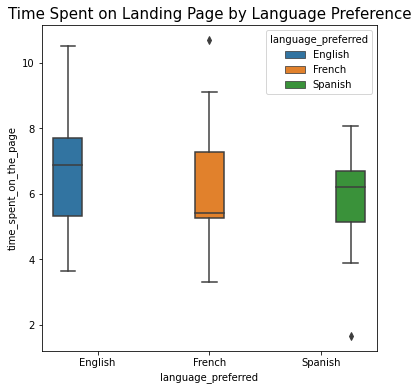

In [327]:
#b is the dataframe that we made by slicing our original dataframe to only include users who received the new landing page.
print(b.groupby("language_preferred")["time_spent_on_the_page"].mean()) #prints the mean of time spent on page by language preference

# creates the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = b, hue = 'language_preferred')
a.set_title("Time Spent on Landing Page by Language Preference", fontsize=15)
plt.show()

From this boxplot, we can see that the means of time spent on the landing page slightly varies per language preference

To test to see if all the means are the same, we need to use an ANOVA test. We must make sure our data satisfies the ANOVA assumptions. We need to do 2 tests to determine if the data is normal and has equal variance.  We need to do the Shapiro-Wilk's test and the Levene's test.  Let's start with the Shapiro-Wilk's test to test for normality.

### Shapiro-Wilk's Test
<br> $H_{0}$: Time spent on the page has normal distribution
<br> $H_{a}$: Time spent on the page does not have a normal distribution

In [328]:
from scipy import stats  #imports the required function to test normality

# find the p-value
w, p_value = stats.shapiro(b['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since our p-value was very large, we fail to reject the null hypothesis and can assume our data follow normal distribution.
<br>Now lets test for equal variance.

### Levene's Test
$H_{0}$: All the population variances are equal
<br>$H_{a}$: at least one variance is different from the rest

In [329]:
from scipy.stats import levene #imports proper package for levene function
statistic, p_value = levene(b['time_spent_on_the_page'][b['language_preferred']=="English"], #function to test homogeneity of variance
                                   b['time_spent_on_the_page'][b['language_preferred']=="French"], 
                                   b['time_spent_on_the_page'][b['language_preferred']=="Spanish"])
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since our p-value is greater than our level of significance, we fail to reject the null hypothesis of homogeneity of variances.


### Assumptions
Since our populations are normally distributed, the samples are independent, random samples, and our variances are equal, all of our assumptions are met for the ANOVA test.

### Hypotheses
u1, u2, u3 are the means of time spent on the landing page for English, French, and Spanish language preferred users.
<br>$H_{0}$: u1 = u2 = u3
<br>$H_{a}$: at least one language preference group has a different average time spent on the landing page than the rest.

In [330]:
from scipy.stats import f_oneway  #imports our package to run test

# perform one-way anova test
test_stat, p_value = f_oneway(b.loc[b['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              b.loc[b['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              b.loc[b['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Insight
Since our p-value is much greater than the significance level we can not reject the null hypothesis at the 5% signifcance level. We do NOT have enough statistical evidence to conclude that at least one language preference group has a different average time spent on the new landing page than the rest of them.

## Conclusion


From our EDA and our hypothesis testing, we learned that users in the treatment group, who received the new landing page, spent more time on the landing page and were also more likely to convert (subscribe), regardless of language preference. We also tested to see if language preference had an impact on on how long a user spent on the landing page, as well as if conversion was dependent on language preference.  These tests were inconclusive and we could not say that the average time spent on the landing page or conversion was depedent on language preference. 

## Insights
While we were not able to find any statistical significance that conversion or time spent on the landing page were dependent on language preference, it was abundantly clear that the new landing page lead to more users converting as well as spending more time on the landing page.

My recommendation would be to switch to the new landing page for everyone.  

